#  Imports

In [119]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [13]:
from tensorflow.keras.datasets import mnist

In [14]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

# Preprocessing

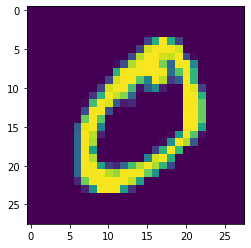

In [18]:
plt.imshow(X_train[1])

In [19]:
X_train.shape

(60000, 28, 28)

In [21]:
X_train = X_train/255.0
X_test = X_test/255.0

In [22]:
X_train.max()

1.0

In [25]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [27]:
inputShape = X_train[0].shape
inputShape

(28, 28, 1)

# Defining Model and Layers

In [35]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=inputShape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)              

# Compiling and Fitting

In [38]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [39]:
history = model.fit(X_train,y_train, batch_size=128, epochs=10, verbose=1,
                   validation_data=(X_test,y_test))

Epoch 1/10
469/469 [==============================] - 37s 79ms/step - loss: 0.2487 - accuracy: 0.9254 - val_loss: 0.0542 - val_accuracy: 0.9826
Epoch 2/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0888 - accuracy: 0.9735 - val_loss: 0.0413 - val_accuracy: 0.9865
Epoch 3/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0672 - accuracy: 0.9801 - val_loss: 0.0331 - val_accuracy: 0.9886
Epoch 4/10
469/469 [==============================] - 37s 78ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0283 - val_accuracy: 0.9904
Epoch 5/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0459 - accuracy: 0.9857 - val_loss: 0.0319 - val_accuracy: 0.9894
Epoch 6/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0414 - accuracy: 0.9870 - val_loss: 0.0289 - val_accuracy: 0.9906
Epoch 7/10
469/469 [==============================] - 37s 79ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.0275 - val_accuracy:

In [52]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0304 - accuracy: 0.9915


# Visualization of Accuracy and Loss with Epoch

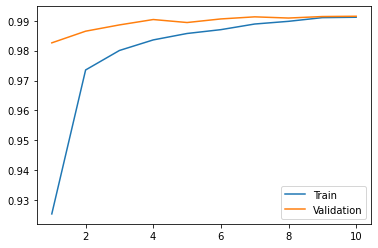

In [93]:
plt.plot(range(1,11),history.history['accuracy'])
plt.plot(range(1,11),history.history['val_accuracy'])
plt.legend(['Train','Validation'])

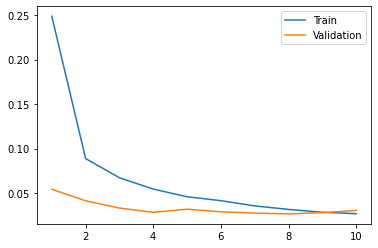

In [94]:
plt.plot(range(1,11),history.history['loss'])
plt.plot(range(1,11),history.history['val_loss'])
plt.legend(['Train','Validation'])

# Predictions

In [53]:
predictions = model.predict(X_test)

In [55]:
np.argmax(predictions[0])

7

In [62]:
finalPred = []
for x in range(len(predictions)):
    finalPred.append(np.argmax(predictions[x]))

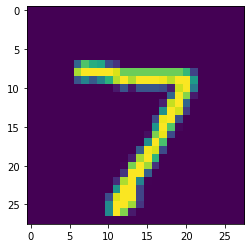

In [57]:
plt.imshow(X_test[0])

In [58]:
y_test[0]

7

In [103]:
answers = pd.DataFrame(y_test,columns=['True'])
answers['Predicted'] = finalPred
answers['Correct Pred'] = answers['True'] - answers['Predicted']

In [104]:
correct = 0
incorrect = 0
for x in range(0,len(answers)):
    if answers.iloc[x]['Correct Pred']==0:
        correct+=1
    else: incorrect+=1
        
print("Percentage Correct: "+str(correct/len(answers)))
print("Percentage Incorrect: "+str(incorrect/len(answers)))

Percentage Correct: 0.9915
Percentage Incorrect: 0.0085


In [88]:
import cv2

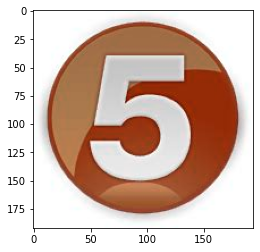

In [113]:
test1 = cv2.imread('test3.jpg')
plt.imshow(test1)

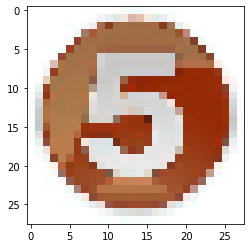

In [114]:
test1 = cv2.resize(test1,(28,28))
plt.imshow(test1)

## I had trouble trying to run a new image, reshaping wouldnt work

In [116]:
test1.reshape(28,28,1)

ValueError: cannot reshape array of size 2352 into shape (28,28,1)

In [109]:
test1 = (np.expand_dims(test1,0))

In [111]:
predictions_single = model.predict(test1)

ValueError: in user code:

    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_2 is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 28, 28, 3]
